Autor:
Manuel Eugenio Morocho Cayamcela, PhD

### Trabajo individual

1. **Buscar una nueva base de datos:**
   - **Buscar** una base de datos nueva e **identificar** la(s) variable(s) predictora(s) y objetivo.

PRECIO DE TICKETS DE VUELOS DE AVION

Se hara un modelo de prediccion para tickets de vuelos de avion

In [10]:
# Escribe tu código aquí..
# Importamos los paquetes necesarios
from sklearn.linear_model import LinearRegression # Regresión lineal con scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cargamos la base de datos 'insurance.csv'
insurance = pd.read_csv('Clean_Dataset.csv')

# Visualizamos las primeras 10 filas de la base de datos cargada
insurance.head(10)
insurance.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [22]:
insurance.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [23]:
insurance.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [25]:
ciudades_unicas = insurance['airline'].unique()

print(ciudades_unicas)

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [24]:
categorical_cols = insurance.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_cols)

for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(insurance[col].value_counts())



Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')

Columna: airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

Columna: source_city
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

Columna: departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Columna: stops
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

Columna: arrival_time
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64



In [26]:
#Columna: class
#class
#Economy     206666
#Business     93487

insurance['class']=insurance['class'].replace({'Economy':0,'Business':1})

C:\Users\pcstu\AppData\Local\Temp\ipykernel_7484\565607405.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance['class']=insurance['class'].replace({'Economy':0,'Business':1})


In [27]:
# Escribe tu código aquí..
categorical_cols = insurance.select_dtypes(include=['object', 'category', 'bool']).columns
print(categorical_cols)

for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(insurance[col].value_counts())


Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city'],
      dtype='object')

Columna: airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

Columna: source_city
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

Columna: departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Columna: stops
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

Columna: arrival_time
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

Columna: 

In [29]:

columnas_a_codificar = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']

# Aplicar get_dummies a las columnas seleccionadas
df_codificado = pd.get_dummies(insurance, columns=columnas_a_codificar, drop_first=True)

# Imprimir el resultado para ver el nuevo DataFrame
print(df_codificado.head())

   class  duration  days_left  price  airline_Air_India  airline_GO_FIRST  \
0      0      2.17          1   5953              False             False   
1      0      2.33          1   5953              False             False   
2      0      2.17          1   5956              False             False   
3      0      2.25          1   5955              False             False   
4      0      2.33          1   5955              False             False   

   airline_Indigo  airline_SpiceJet  airline_Vistara  source_city_Chennai  \
0           False              True            False                False   
1           False              True            False                False   
2           False             False            False                False   
3           False             False             True                False   
4           False             False             True                False   

   ...  arrival_time_Early_Morning  arrival_time_Evening  \
0  ...        

In [30]:
df_codificado.columns

Index(['class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [ ]:
X = df_codificado.drop('price', axis=1)
X
y = df_codificado['price']
y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustamos el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# Guardamos el modelo para usarlo en el futuro
import joblib
joblib.dump(modelo_regresion, 'modelo_regresion2.pkl')

# Cargamos el modelo guardado
modelo_regresion = joblib.load('modelo_regresion2.pkl')

Ecuación de la recta de regresión: y = 44912.03836804657*X0 + 39.772092881988044*X1 + -131.45049557216313*X2 + 155.68821561175116*X3 + 1697.9519477961046*X4 + 2146.3006973088522*X5 + 2352.832579943751*X6 + 4122.307165372078*X7 + -82.25913244646799*X8 + -1390.7878143449054*X9 + -1659.5228871729387*X10 + 1611.6989869197093*X11 + -199.5256324872557*X12 + 845.3064930549763*X13 + 705.1957664100607*X14 + 1574.0005614788165*X15 + 861.203679887111*X16 + 652.7800097523099*X17 + 2093.0699694006726*X18 + -7594.6256667858515*X19 + -741.209776131029*X20 + 925.4413247292803*X21 + 985.2092077168861*X22 + 488.519734131949*X23 + 1149.3828558139649*X24 + -218.8540077184964*X25 + -1557.2080414095055*X26 + -1702.3279609790661*X27 + 1414.286011005528*X28 + -56.32810197227087*X29 + 7638.243142467454
                        Variable   Coeficiente  Abs_Coeficiente
0                          class  44912.038368     44912.038368
19                    stops_zero  -7594.625667      7594.625667
7                ai

C:\Users\pcstu\AppData\Local\Temp\ipykernel_7484\3184572538.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='coolwarm')


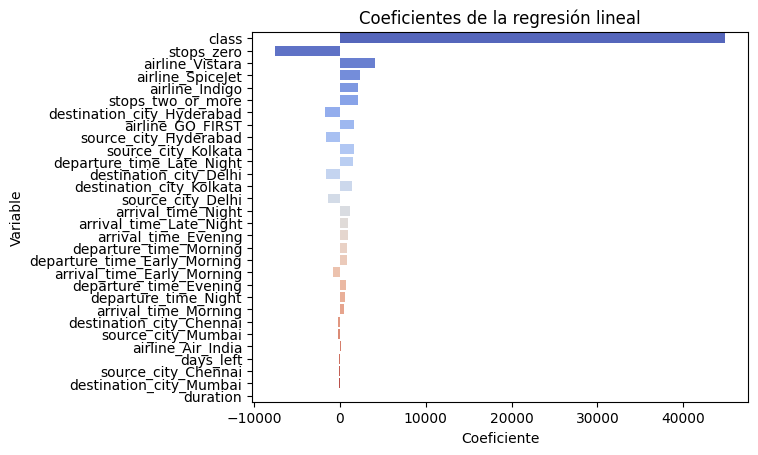

In [33]:
# Obtenemos los coeficientes 
coeficientes = modelo_regresion.coef_
coeficientes
# Obtenemos el intercepto 
intercepto = modelo_regresion.intercept_
intercepto

# Definimos la ecuación de la recta de regresión
ecuacion_recta = 'y = ' + ' + '.join([f'{coeficientes[i]}*X{i}' for i in range(len(coeficientes))]) + f' + {intercepto}'
print(f'Ecuación de la recta de regresión: {ecuacion_recta}')

# Crear un DataFrame para facilitar la interpretación
coef_df = pd.DataFrame({'Variable': X.columns, 'Coeficiente': coeficientes})

# Ordenar por el valor absoluto del coeficiente para ver cuáles son más importantes
coef_df['Abs_Coeficiente'] = coef_df['Coeficiente'].abs()

# Ordenamos los coeficientes de mayor a menor
coef_df = coef_df.sort_values(by='Abs_Coeficiente', ascending=False)

print(coef_df)

# Graficamos los coeficientes ordenados de mayor a menor en un gráfico de barras
sns.barplot(x='Coeficiente', y='Variable', data=coef_df, palette='coolwarm')

plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes de la regresión lineal')
plt.show()

In [34]:
# Realizamos predicciones sobre el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Importamos las métricas para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimimos las métricas de evaluación
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')

Error Cuadrático Medio (MSE): 45579067.414074995
Coeficiente de Determinación (R^2): 0.9115414955520675
Error Absoluto Medio (MAE): 4558.109166780458



2. **Ajusta del Modelo:**
   - **Ajusta** un modelo de regresión lineal.
   - **Evalúa** el rendimiento del modelo (ejm: `MSE`).
   - (Opcional) Usa [`cross_val_score`](https://scikit-learn.org/stable/modules/cross_validation.html) con 5 folds. Calcula la media del MSE y la desviación estándar de todos los scores obtenidos con la validación cruzada (opcional).
   - (Opcional) Usa la librería [SHAP](https://shap.readthedocs.io/en/latest/) para **explicar** de manera gráfica la salida del modelo (por ejemplo, puedes crear un objeto `explainer` con el modelo y los datos de entrenamiento, y calcular los valores SHAP).

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


X = df_codificado.drop('price', axis=1)
X
y = df_codificado['price']
y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajustamos el modelo a los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

print("Score del modelo de Regresion"+modelo_regresion.score(X_train,y_train))

print("Validacion crusada"+cross_val_score(modelo_regresion,X_train, y_train, cv=5).mean())




NameError: name 'df_codificado' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

modelo_regresion = LinearRegression()

scores_mse = cross_val_score(modelo_regresion, X, y, cv=5, scoring='neg_mean_squared_error')


scores_mse_positivos = -scores_mse

print("Scores de MSE para cada fold:", scores_mse_positivos)


media_mse = np.mean(scores_mse_positivos)
desviacion_estandar_mse = np.std(scores_mse_positivos)

print(f"\nMedia del MSE con validación cruzada: {media_mse:.2f}")
print(f"Desviación estándar del MSE: {desviacion_estandar_mse:.2f}")

Scores de MSE para cada fold: [3.09535621e+07 1.89033917e+07 2.33655470e+07 8.94015135e+07
 1.30904984e+08]

Media del MSE con validación cruzada: 58705799.56
Desviación estándar del MSE: 44177598.00


   
3. **Predicción de Nuevos Registros:**
   - Utiliza el modelo ajustado para **predecir** el valor de `y` de un nuevo registro.

Prediccion del precio del ticket para un nuevo caso

El costo estimado del pasaje es: $747.42


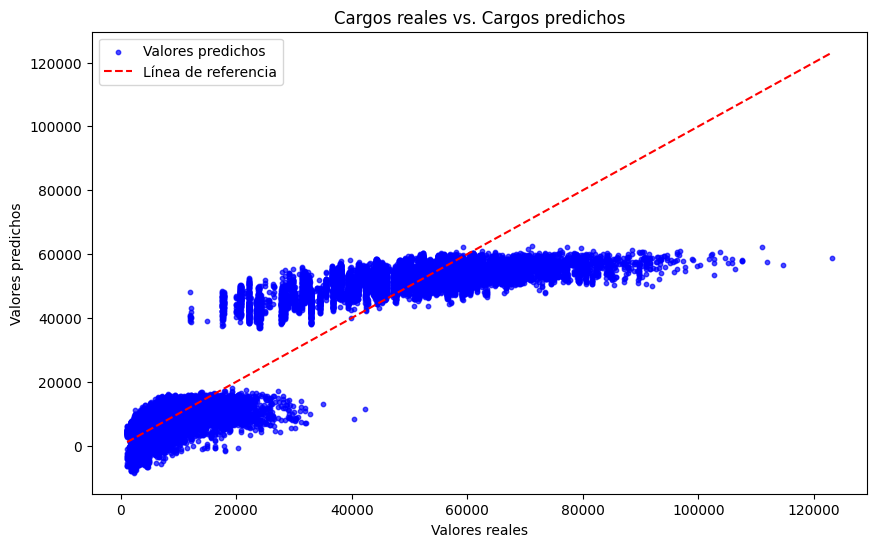

In [ ]:
# Definimos un nuevo caso de prueba con los siguientes valores
nuevo_caso = pd.DataFrame({
    'class': [0],
    'duration': [3.5],
    'days_left': [15],
    
    # Columnas de 'airline'
    'airline_Air_India': [0],
    'airline_GO_FIRST': [0],
    'airline_Indigo': [0],
    'airline_SpiceJet': [1],  # El vuelo es de SpiceJet
    'airline_Vistara': [0],
    
    # Columnas de 'source_city'
    'source_city_Chennai': [0],
    'source_city_Delhi': [1],  # El vuelo sale de Delhi
    'source_city_Hyderabad': [0],
    'source_city_Kolkata': [0],
    'source_city_Mumbai': [0],
    
    # Columnas de 'departure_time'
    'departure_time_Early_Morning': [0],
    'departure_time_Evening': [1],  # El vuelo sale por la noche
    'departure_time_Late_Night': [0],
    'departure_time_Morning': [0],
    'departure_time_Night': [0],
    
    # Columnas de 'stops'
    'stops_two_or_more': [0],
    'stops_zero': [1],  # Es un vuelo directo
    
    # Columnas de 'arrival_time'
    'arrival_time_Early_Morning': [0],
    'arrival_time_Evening': [1],  # Llega por la noche
    'arrival_time_Late_Night': [0],
    'arrival_time_Morning': [0],
    'arrival_time_Night': [0],
    
    # Columnas de 'destination_city'
    'destination_city_Chennai': [0],
    'destination_city_Delhi': [0],
    'destination_city_Hyderabad': [0],
    'destination_city_Kolkata': [0],
    'destination_city_Mumbai': [1] # El destino es Mumbai
}
)

# Realizamos la predicción con el nuevo caso de prueba
prediccion = modelo_regresion.predict(nuevo_caso)

# Imprimimos el resultado de la predicción
print(f'El costo estimado del pasaje es: ${prediccion[0]:.2f}')

# Graficamos los valores reales vs los valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, s=10)
plt.title('Cargos reales vs. Cargos predichos')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.legend(['Valores predichos', 'Línea de referencia'])
plt.show()


### **Conclusiones:**
A través de este análisis, usado regresión lineal para predecir el PRECIO de los tickets de un vuelo, basandonos en sus parametros



     ---------------------------------------- 0.0/544.3 kB ? eta -:--:--
     ------ -------------------------------- 92.2/544.3 kB 5.5 MB/s eta 0:00:01
     ------------------------ ------------- 348.2/544.3 kB 5.5 MB/s eta 0:00:01
     -------------------------------------- 544.3/544.3 kB 5.7 MB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached numba-0.61.2-cp310-cp310-win_amd64.whl (2.8 MB)
  Using cached llvmlite-0.44.0-cp310-cp310-win_amd64.whl (30.3 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


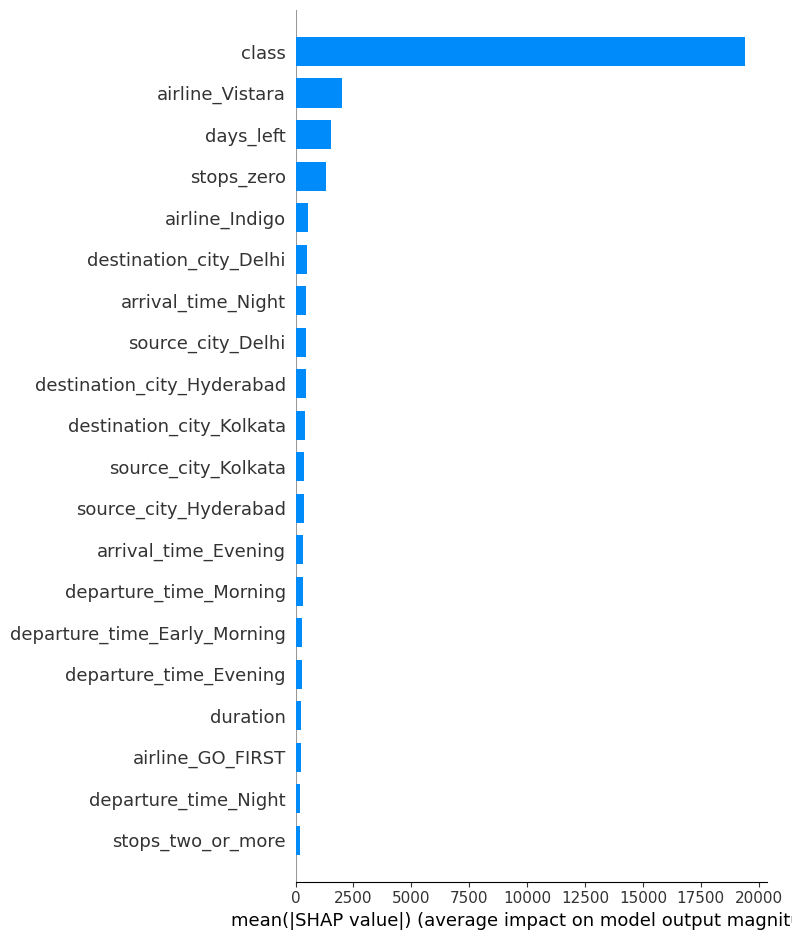

In [37]:
# PISTA
# Usa SHAP para explicar el modelo

# Instala SHAP
%pip install shap

# Importa SHAP
import shap 

# Crea un objeto explainer con el modelo y los datos de entrenamiento
explainer = shap.Explainer(modelo_regresion, X_train)

# Calcula los valores SHAP para todos los datos de prueba
shap_values = explainer(X_test)

# Grafica los valores SHAP
shap.summary_plot(shap_values, X_test, plot_type='bar')

# # Grafica los valores SHAP para un punto de datos específico
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

Usando SHAP podemos concluir que la feature mas importante para este modelo vendria a ser la CLASE es decir Ejecutiva o Turista